# Practica 3. Análisis de Señales bioeléctricas

## Actividad I


### Seleccionar un registro de los realizados en la Práctica 0

            Seleccionamos el archivo de la medición numero 7 

### Acondicionar los registros

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import hann
from scipy        import fftpack as fft
from scipy.signal import hann
from scipy.signal import chebwin
from scipy.signal import blackman
from scipy        import signal
from scipy.signal import butter
from scipy.signal import filtfilt

In [2]:
#PSD
def PSD (signal, l=1024, T=0.5, sr=1000):

    N=signal.shape[0]
    psd=[]

    i = 0;
    cont = 0;
    while cont <= N:
        ps=fft.fft(signal[i:i+l])
        psd.append(20*np.log(np.abs(ps)))
        i = i+int((1-T)*l)
        cont = i+l
    
    psd=np.array(psd[:-1])    
    psd = np.mean(psd,0)

    n = np.size(psd,0)//2

    plt.plot(np.linspace(0,sr/2,n), psd[0:n])
    plt.grid(True)
    return [psd[0:n]]

In [4]:
def m_movil_t (x, N=1024):
    y = []
    for i in range(len(x)//N):
        m = np.mean(x[i*N:i*N+N])
        y.append(x[i*N:i*N+N]-m)
    return (np.array(y).flatten())

In [5]:
def ten_lin (s, t, N=1024):
    y_fin = []
    for i in range(len(s)//N):
        x = []
        x.append(t[i*N:i*N+N])
        x.append(np.ones(len(t[i*N:i*N+N])))
        x = np.array(x).T
        
        y = []
        y.append(s[i*N:i*N+N])
        y = np.array(y).T
        
        w = np.dot(x.T,x)
        w = np.linalg.inv(w)
        w = np.dot(w, x.T)
        w = np.dot(w,y)
        
        yy = w[0]*t[i*N:i*N+N] + w[1]
        yy = s[i*N:i*N+N]-yy
        
        y_fin.append(yy)
        
    return (np.array(y_fin).flatten())

In [6]:
def filt_but(s, w, ord = 5):
    w = w/500
    [b,a] =butter(ord, w, 'low')
    x = filtfilt(b, a, s)
    return (x,b,a)

In [7]:
path = '/Users/Arroy javier/Desktop/MCIB/MCIB-19-P/data/Señales adquirid/'
fname = 'Medi7.txt'

In [8]:
data = np.loadtxt(path+fname,delimiter='\t',dtype='str')

t=data[ : , 0]
SO2=data[:,1]
RESP=data[:,2]
EMG=data[:,3]
PUL=data[:,4]
ECG=data[:,5]

t    = t.astype('float')*60
SO2  = SO2.astype('float')
RESP = RESP.astype('float')
EMG  = EMG.astype('float')
PUL  = PUL.astype('float')
ECG  = ECG.astype('float')


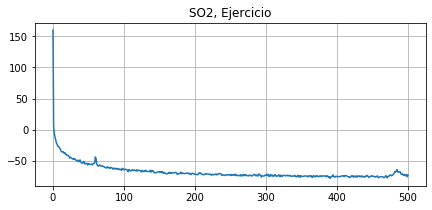

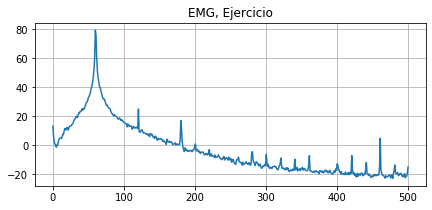

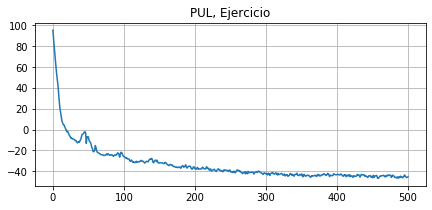

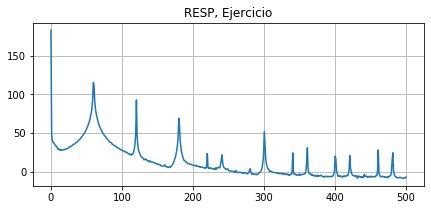

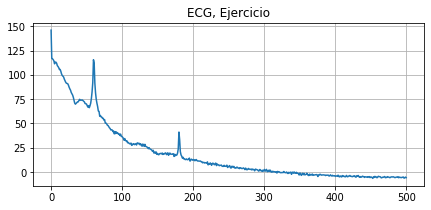

In [9]:
plt.figure(figsize = (7, 3)) 
plt.title("SO2, Ejercicio") 
PS1= PSD (SO2)

plt.figure(figsize = (7, 3)) 
PS2= PSD (EMG)
plt.title("EMG, Ejercicio") 

plt.figure(figsize = (7, 3)) 
PS3= PSD (PUL)
plt.title("PUL, Ejercicio") 

plt.figure(figsize = (7, 3)) 
PS4= PSD (RESP)
plt.title("RESP, Ejercicio") 

plt.figure(figsize = (7, 3)) 
PS5= PSD (ECG)
plt.title("ECG, Ejercicio")
plt.show()

In [14]:
# Filtro notch para quitar el ruido de 60 Hz en algunas señales
[b_n, a_n] = signal.iirnotch(60.0, 70.0, 1000)

# Filtramos las señales
#SO2
[SO2_f, b, a]= filt_but(SO2, 10)

#RESP
[RESP_f, b, a]= filt_but(RESP, 5)

#EMG
EMG_n= filtfilt(b_n, a_n, EMG)
[EMG_f, b, a]= filt_but(EMG_n, 150)

#PUL
[PUL_f, b, a]= filt_but(PUL, 10)

#ECG
ECG_n= filtfilt(b_n, a_n, ECG)
[ECG_f, b, a]= filt_but(ECG_n, 100)
ECG_f = ten_lin (ECG_f, t)



## Graficas de las señales acondicionadas

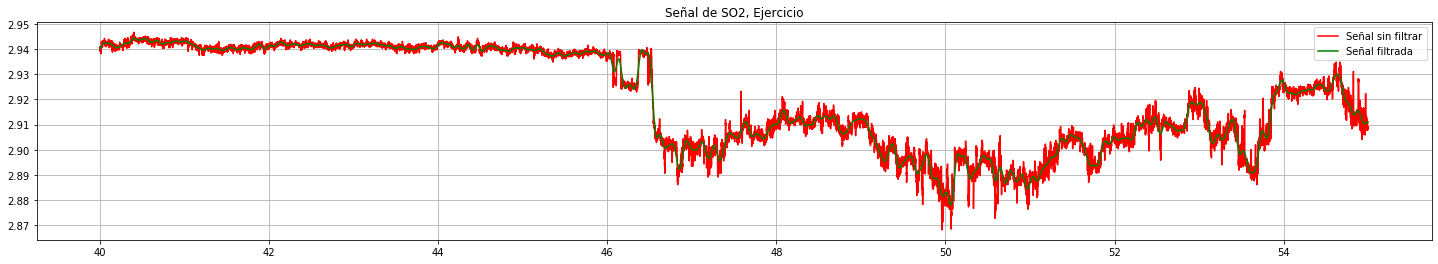

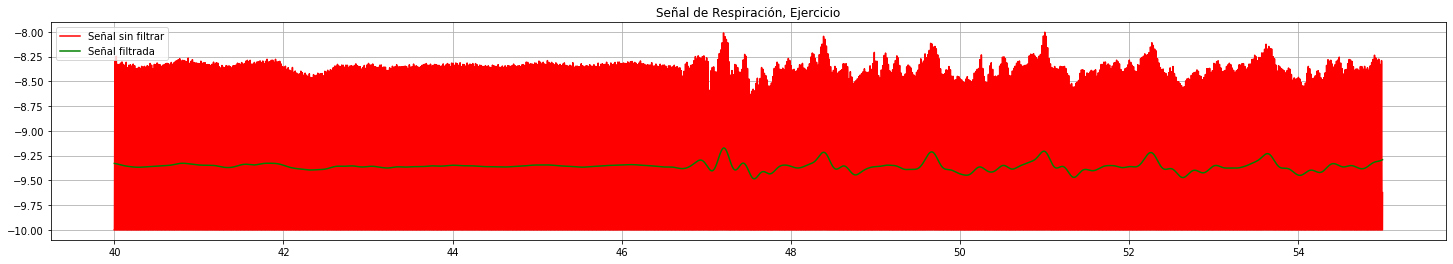

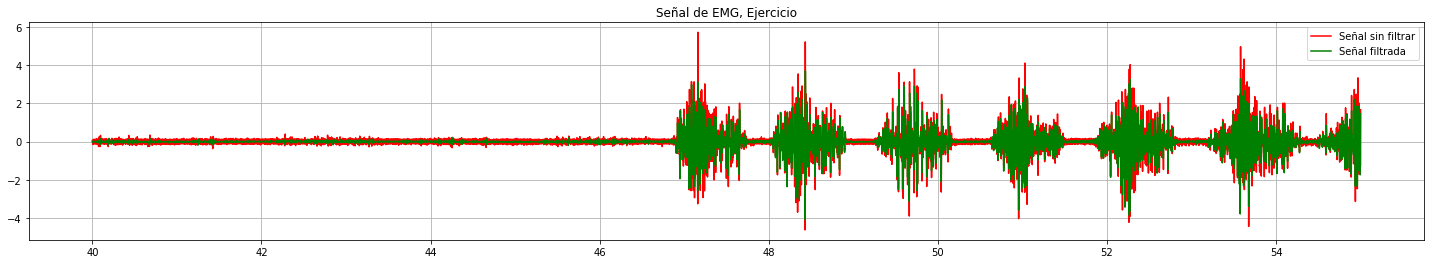

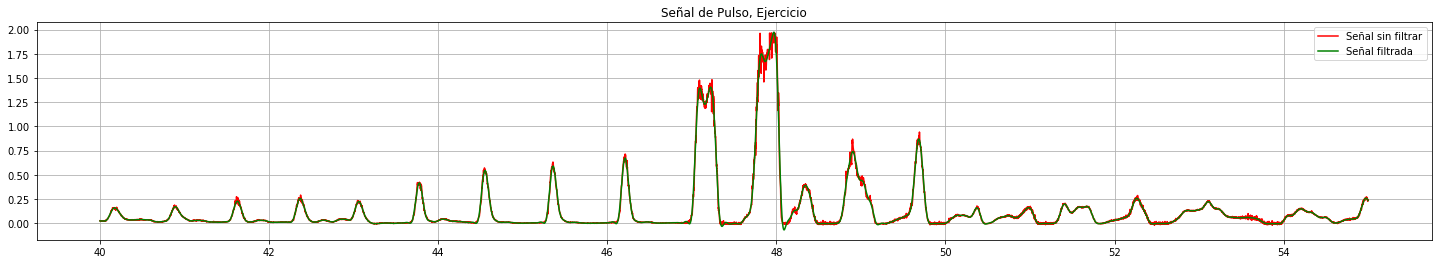

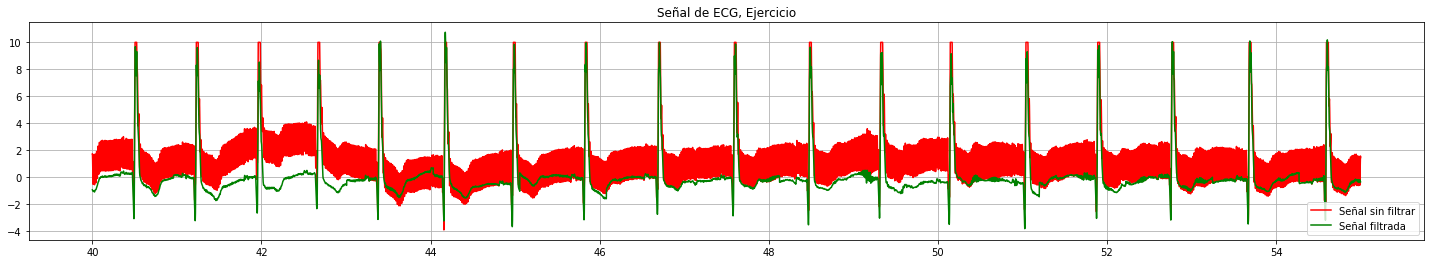

In [15]:
plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], SO2[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], SO2_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de SO2, Ejercicio") 
plt.grid(True)

plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], RESP[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], RESP_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de Respiración, Ejercicio") 
plt.grid(True)

plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], EMG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], EMG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de EMG, Ejercicio") 
plt.grid(True)

plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], PUL[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], PUL_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de Pulso, Ejercicio") 
plt.grid(True)


plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], ECG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], ECG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de ECG, Ejercicio") 
plt.grid(True)
plt.show()

### 2. Segmentar el registro en partes basales y con actividad
       Hay  que consederar 4 momentos en la señal
           1.- Reposo [21-31s]
           2.- Adaptación en pie  [35-45s]
           3.- Actividad ó ejercicio  [56-66s]
           4.- Recuperacion   [78-88s]
       Tomaremos 10s de cada momento

In [17]:

SO2_f_1 = SO2_f[21000:31000]
SO2_f_2 = SO2_f[35000:45000]
SO2_f_3 = SO2_f[56000:66000]
SO2_f_4 = SO2_f[78000:88000]

RESP_f_1 = RESP_f[21000:31000]
RESP_f_2 = RESP_f[35000:45000]
RESP_f_3 = RESP_f[56000:66000]
RESP_f_4 = RESP_f[78000:88000]

EMG_f_1 = EMG_f[21000:31000]
EMG_f_2 = EMG_f[35000:45000]
EMG_f_3 = EMG_f[56000:66000]
EMG_f_4 = EMG_f[78000:88000]

PUL_f_1 = PUL_f[21000:31000]
PUL_f_2 = PUL_f[35000:45000]
PUL_f_3 = PUL_f[56000:66000]
PUL_f_4 = PUL_f[78000:88000]

ECG_f_1 = ECG_f[21000:31000]
ECG_f_2 = ECG_f[35000:45000]
ECG_f_3 = ECG_f[56000:66000]
ECG_f_4 = ECG_f[78000:88000]


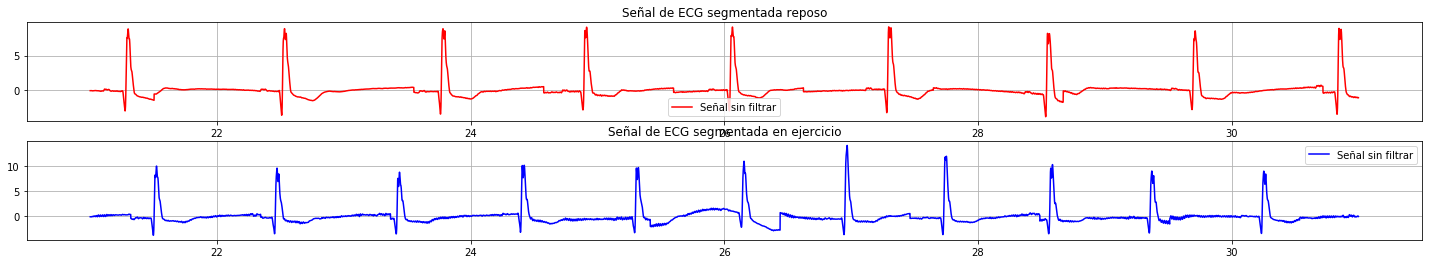

In [34]:
plt.figure(figsize = (25, 4))
plt.subplot(2,1,1)
plt.plot(t[21000:31000], ECG_f[21000:31000],color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de ECG segmentada reposo") 
plt.grid(True)

plt. subplot(2,1, 2)
plt.plot(t[21000:31000], ECG_f[56000:66000],color = 'blue', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de ECG segmentada en ejercicio") 
plt.grid(True)
plt.show()

### Reescalar las senales: 
#### a) Intervalo [-1, 1]


In [35]:
# Creamos una función para reescalar de [-1, 1]
def reescalar_a (x):
    ran = max(x) - min(x)
    new_x = x*2/ran
    new_x = new_x -(max(new_x)-1)
    return (new_x)

In [35]:
SO2_new1 = reescalar_a (SO2_f_3);
plt.figure(figsize = (25, 4))
plt.plot(SO2_new1)
plt.title("Señal de SO2 reescalada [-1,1], Ejercicio") 
plt.grid(True)

RESP_new1 = reescalar_a (RESP_f_3);
plt.figure(figsize = (25, 4))
plt.plot(RESP_new1)
plt.title("Señal de Respiracion reescalada [-1,1], Ejercicio") 
plt.grid(True)

EMG_new1 = reescalar_a (EMG_f_3);
plt.figure(figsize = (25, 4))
plt.plot(EMG_new1)
plt.title("Señal de EMG reescalada [-1,1], Ejercicio") 
plt.grid(True)

PUL_new1 = reescalar_a (SO2_f_3);
plt.figure(figsize = (25, 4))
plt.plot(PUL_new1)
plt.title("Señal de Pulso reescalada [-1,1], Ejercicio") 
plt.grid(True)

ECG_new1 = reescalar_a (ECG_f_3);
plt.figure(figsize = (25, 4))
plt.plot(ECG_new1)
plt.title("Señal de ECG reescalada [-1,1] , Ejercicio") 
plt.grid(True)



NameError: name 'reescalar_a' is not defined

In [48]:
# Creamos una función para z-score
def z_score(x):
    med = np.mean(x)
    s = np.std(x)
    new_x = (x-med)/s 
    return (new_x)

-3.3514879760332406e-14
1.0


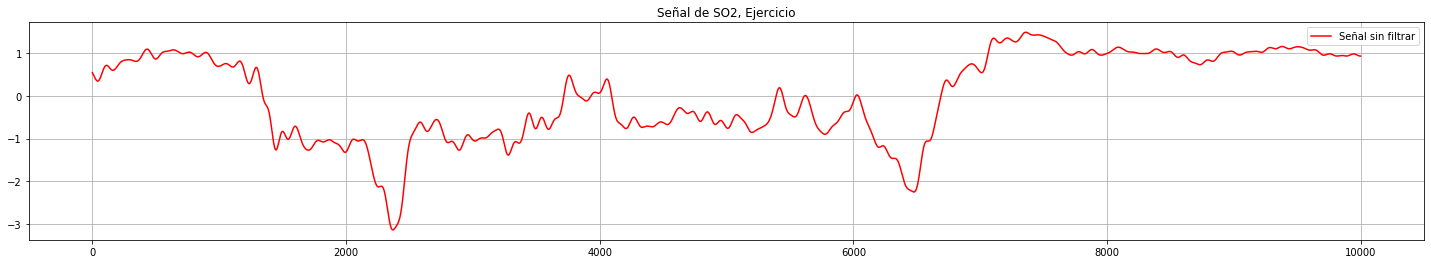

7.332801033044234e-15
1.0


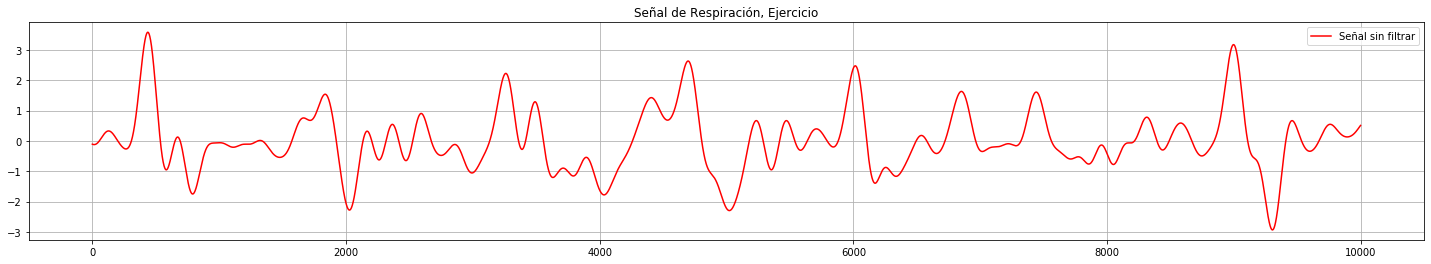

3.68594044175552e-18
1.0


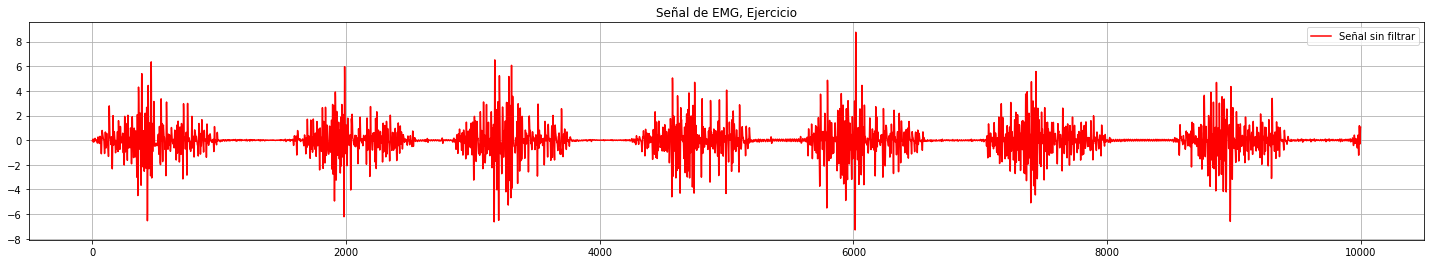

5.616129783447832e-15
1.0


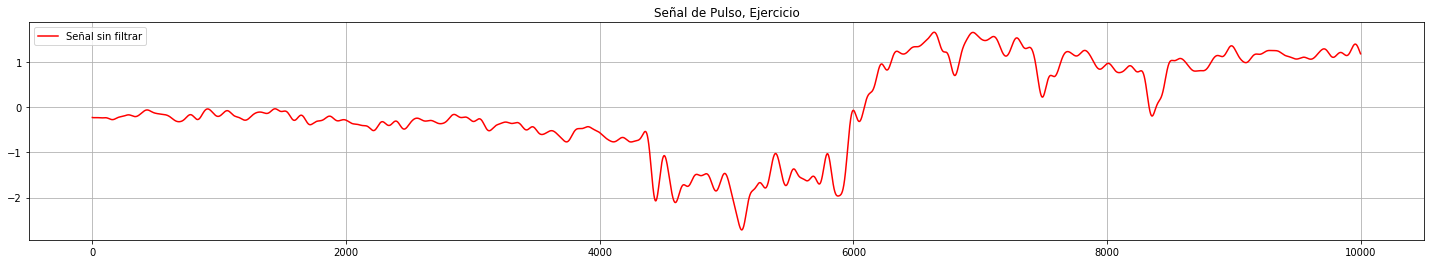

-7.105427357601002e-18
0.9999999999999999


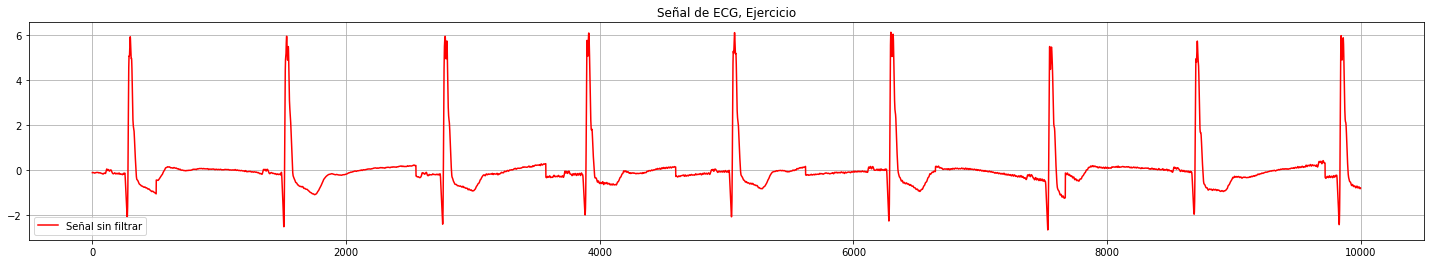

In [50]:
SO2_new = z_score (SO2_f_3);
print(np.mean(SO2_new))
print(np.std(SO2_new))
plt.figure(figsize = (25, 4))
plt.plot(SO2_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de SO2, Ejercicio") 
plt.grid(True)
plt.show()

RESP_new = z_score (RESP_f_3);
print(np.mean(RESP_new))
print(np.std(RESP_new))
plt.figure(figsize = (25, 4))
plt.plot(RESP_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de Respiración, Ejercicio") 
plt.grid(True)
plt.show()


EMG_new = z_score (EMG_f_3);
print(np.mean(EMG_new))
print(np.std(EMG_new))
plt.figure(figsize = (25, 4))
plt.plot(EMG_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de EMG, Ejercicio") 
plt.grid(True)
plt.show()


PUL_new = z_score (SO2_f_1);
print(np.mean(PUL_new))
print(np.std(PUL_new))
plt.figure(figsize = (25, 4))
plt.plot(PUL_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de Pulso, Ejercicio") 
plt.grid(True)
plt.show()


ECG_new = z_score (ECG_f_1);
print(np.mean(ECG_new))
print(np.std(ECG_new))
plt.figure(figsize = (25, 4))
plt.plot(ECG_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de ECG, Ejercicio") 
plt.grid(True)
plt.show()



In [69]:
def histogram(s, nbins = 10, width = 0.5):
    intervals = np.linspace(s.min(), s.max(), nbins+1)
    left = s[:,np.newaxis]>intervals[:-1][np.newaxis]
    right = s[:,np.newaxis]<intervals[1:][np.newaxis]
    hist = (left*right).sum(axis = 0)
    return(intervals[:-1], hist)

In [72]:
#(yea, hiy) = histogram(ECG_f, 100, 0.1)
k=np.sqrt(len(ECG_new))
(a, b) = histogram(ECG_new, k, 0.1, color=)
plt.bar(intervals[:-1],hist,width,color='red')
    plt.grid(True)
(a, b) = histogram(ECG_f_3, k, 0.1 )
plt.bar(intervals[:-1],hist,width,color='green')
    plt.grid(True)

SyntaxError: invalid syntax (<ipython-input-72-7d1855a82337>, line 3)

In [ ]:
def correlacion(x1,x2):
    